# Precio de acciones en concreteras.

##  Objetivos.
### objetivo general.
Evaluar el comportamiento de las acciones de las empresas a estudiar mediante el uso de simulaciones aleatorias con una tasa de interes **del 5%**.
### Obejitvo especificos
De cada unda de las empresas comparar los resultados con las acciones verdaderas para ver si es viable o no confiar en la simulacion realizada.

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_closes(names,start,end):
    closes = web.DataReader(name=names,data_source="yahoo",start=start,end=end)
    return closes["Adj Close"] 

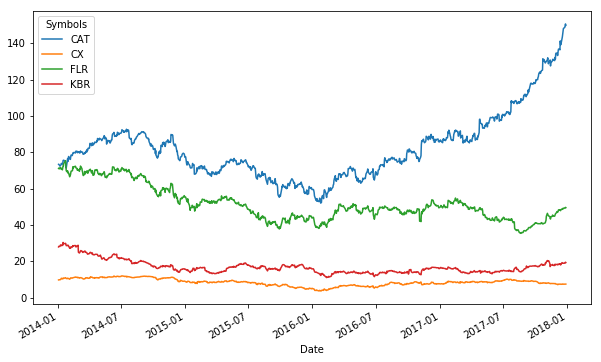

In [5]:
names = ['FLR','CX',"CAT","KBR"]
start, end = '2014-01-01', '2017-12-31'
closes = get_closes(names,start,end)
closes.plot(figsize=(10,6));

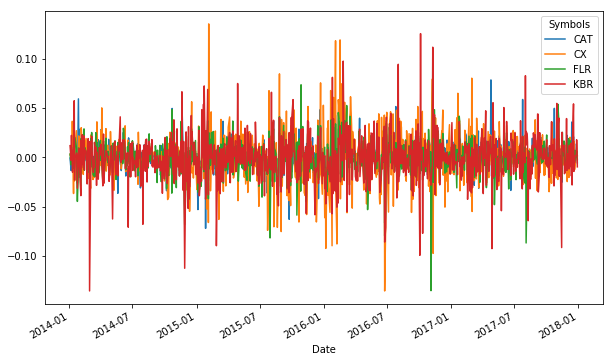

In [6]:
ret = closes.pct_change().dropna()
ret.plot(figsize=(10,6));

In [7]:
mu_FLR, mu_CX, mu_CAT, mu_KBR = ret.mean().FLR, ret.mean().CX, ret.mean().CAT, ret.mean().KBR

mu_FLR, mu_CX, mu_CAT, mu_KBR

(-0.000211756081777327,
 2.997854850584333e-05,
 0.0008186914579297667,
 -0.00011061228277773683)

In [8]:
std_FLR, std_CX, std_CAT, std_KBR = ret.std().FLR, ret.std().CX, ret.std().CAT, ret.std().KBR
std_FLR, std_CX, std_CAT, std_KBR

(0.017083114740489295,
 0.02445453443954151,
 0.014746653579468546,
 0.022640622880552255)

In [10]:
def ret_sim(mu,sigma,ndays,nscen,start_date):
    dates = pd.date_range(start = start_date,periods=ndays)
    rend_sim = sigma*np.random.randn(ndays,nscen) + mu
    return pd.DataFrame(index = dates, data = rend_sim)

In [11]:
simret_FLR = ret_sim(mu_FLR, std_FLR, 364, 1000, '2018-01-01')
simret_CX = ret_sim(mu_CX,std_CX , 364, 1000, '2018-01-01')
simret_CAT = ret_sim(mu_CAT, std_CAT, 364, 1000, '2018-01-01')
simret_KBR = ret_sim(mu_KBR ,std_KBR, 364, 1000, '2018-01-01')

In [12]:
simcloses_FLR = closes.iloc[-1].FLR*((1+simret_FLR).cumprod())
simcloses_CX= closes.iloc[-1].CX*((1+simret_CX).cumprod())
simcloses_CAT = closes.iloc[-1].CAT*((1+simret_CAT).cumprod())
simcloses_KBR= closes.iloc[-1].KBR*((1+simret_KBR).cumprod())

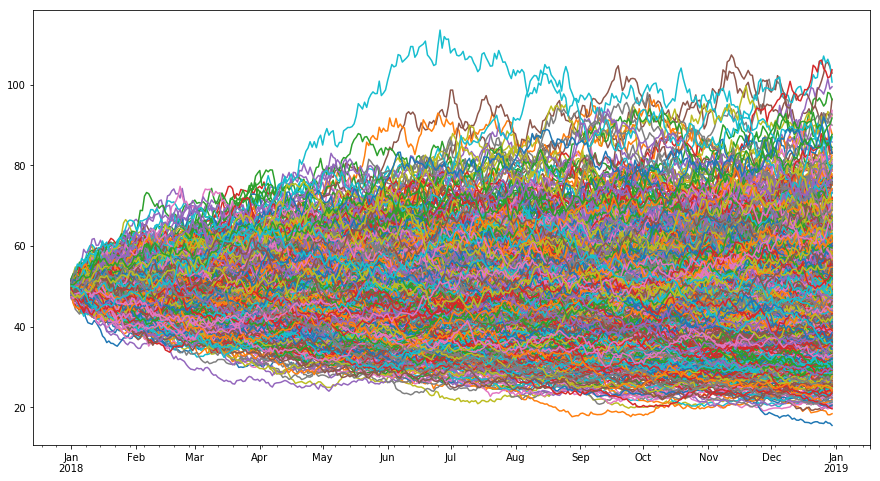

In [13]:
simcloses_FLR.plot(figsize=(15,8),legend=False);

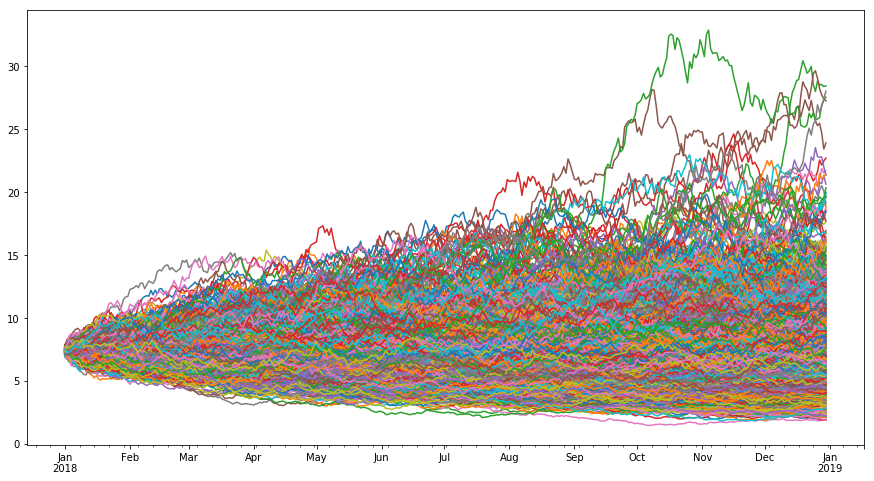

In [14]:
simcloses_CX.plot(figsize=(15,8),legend=False);

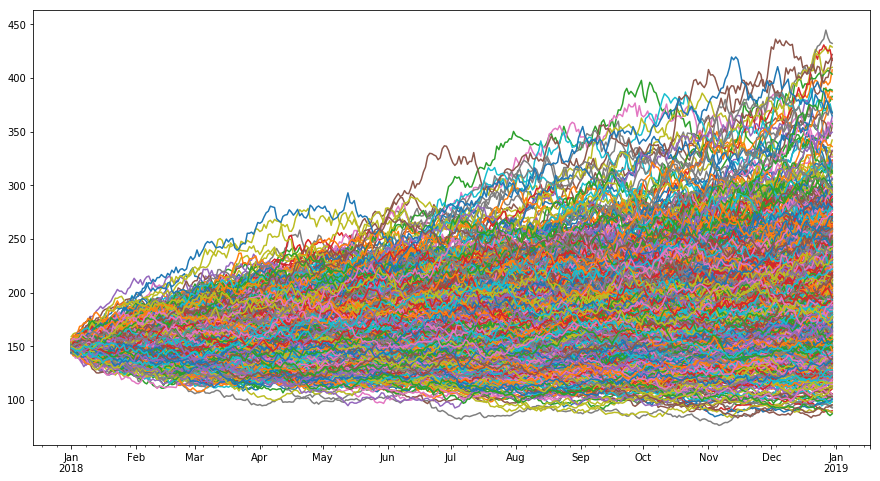

In [15]:
simcloses_CAT.plot(figsize=(15,8),legend=False);

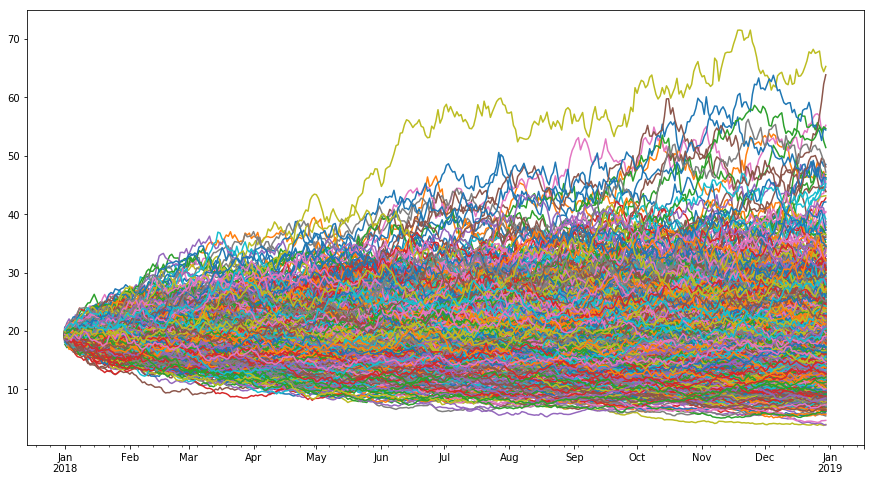

In [16]:
simcloses_KBR.plot(figsize=(15,8),legend=False);

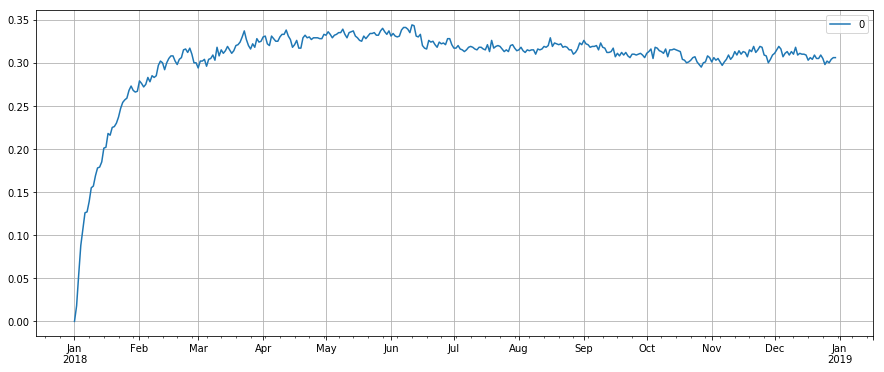

In [17]:
K_FLR = (1+0.05)*closes.iloc[-1].FLR
DF = simcloses_FLR>K_FLR
prob = pd.DataFrame(DF.sum(axis=1)/1000)
prob.plot(figsize=(15,6), grid=True);

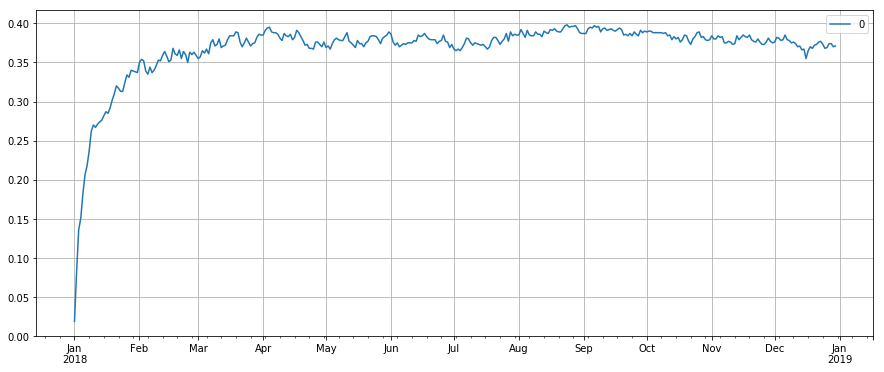

In [18]:
K_CX = (1+0.05)*closes.iloc[-1].CX
DF = simcloses_CX>K_CX
prob = pd.DataFrame(DF.sum(axis=1)/1000)
prob.plot(figsize=(15,6), grid=True);

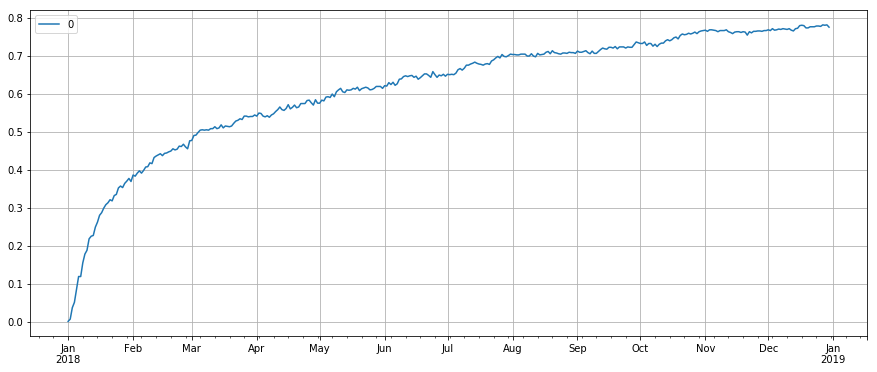

In [19]:
K_CAT = (1+0.05)*closes.iloc[-1].CAT
DF = simcloses_CAT>K_CAT
prob = pd.DataFrame(DF.sum(axis=1)/1000)
prob.plot(figsize=(15,6), grid=True);

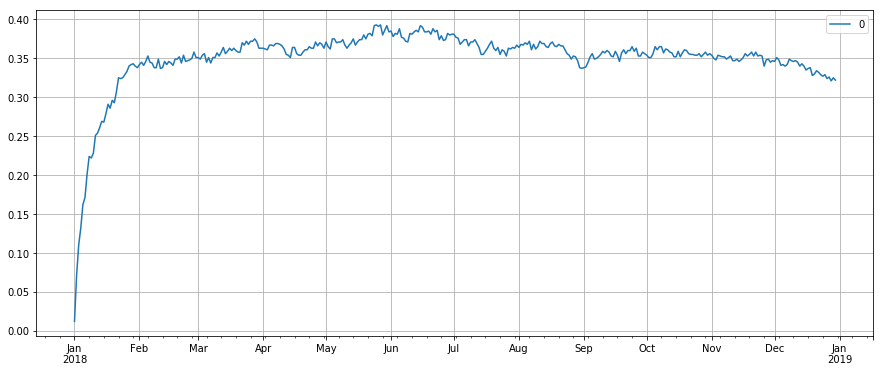

In [20]:
K_KBR = (1+0.05)*closes.iloc[-1].KBR
DF = simcloses_KBR>K_KBR
prob = pd.DataFrame(DF.sum(axis=1)/1000)
prob.plot(figsize=(15,6), grid=True);

In [21]:
start, end = '2018-01-01', '2018-12-31'
name = ['FLR','CX','CAT','KBR']
closes2018 = get_closes(name,start,end)


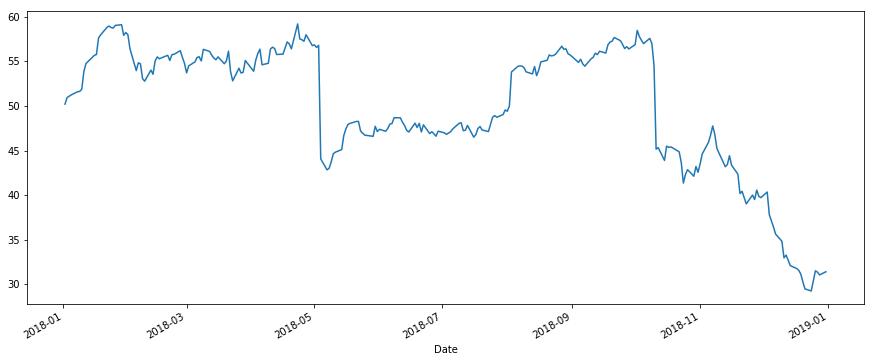

In [22]:
closes2018.FLR.plot(figsize=(15,6));

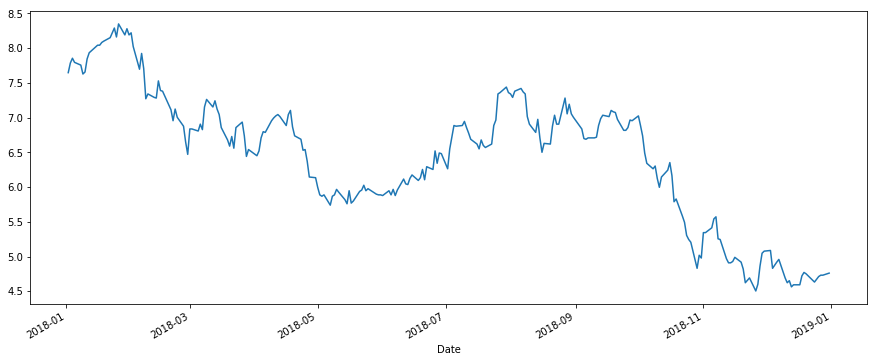

In [23]:
closes2018.CX.plot(figsize=(15,6));

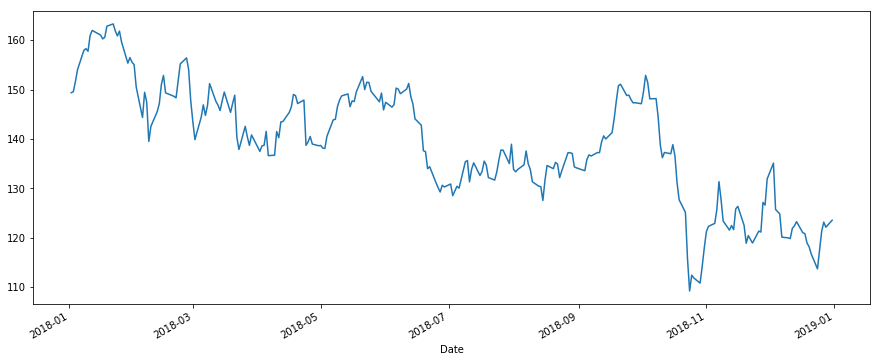

In [24]:
closes2018.CAT.plot(figsize=(15,6));

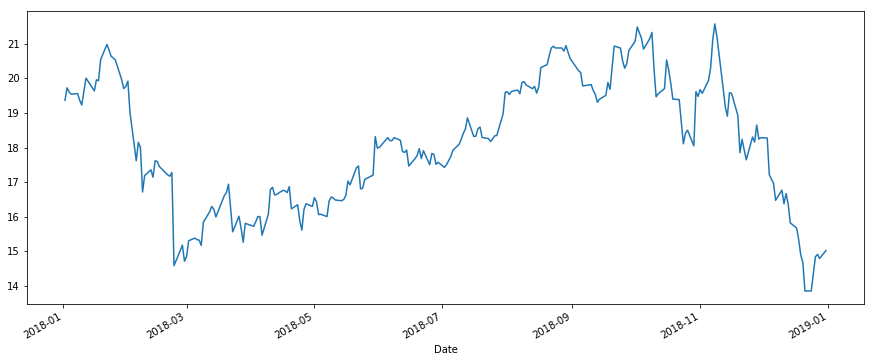

In [25]:
closes2018.KBR.plot(figsize=(15,6));